# Retail Analysis

  Dataset Description:
-  Instances: 3.73 Lakh
-  Features: 6 columns
-  Numerical: 4 columns
-  Categorical: 2 columns

Attribute Information:

-  Order ID: Order identification number for each product
-  Product: Product name
-  Quantity Ordered: Amount of items
-  Price Each: Price of each product per item in dollars
-  Order Date: Date of purchase
-  Purchase Address: Address of purchase order

In [75]:
# this is the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import re

In [76]:
# here i am loading data set of retail.
retail_product = pd.read_csv("all_data_copy.csv")

In [77]:
retail_product.head()    # this is my head portion to check rows and columns.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [79]:
retail_product.tail()     # this is my tail portion to check rows and columns.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 7:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
373699,259357,USB-C Charging Cable,1,11.95,09/30/19 0:18,"250 Meadow St, San Francisco, CA 94016"


## 1.  Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

In [5]:
# summary of the data set.

retail_product.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,18,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


## 2.  Prepare the data frame for further analysis. Clean it, mould it in any manner you see fit.

In [6]:
# i have renamed the columns and cutout the spaces between it . 

retail_product = retail_product.rename(columns={'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each':'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'})
retail_product

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 7:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
# in this data set Purchase Address is given. but it is seems like messy then i have split it into the columns.

retail_product['Purchase_Address'].str.split(',',expand=True)   # because i need city from this data set for the further analysis.

,0,1,2
0,944 Walnut St,Boston,MA 02215
1,185 Maple St,Portland,OR 97035
2,538 Adams St,San Francisco,CA 94016
3,738 10th St,Los Angeles,CA 90001
4,387 10th St,Austin,TX 73301
...,...,...,...
373695,840 Highland St,Los Angeles,CA 90001
373696,216 Dogwood St,San Francisco,CA 94016
373697,220 12th St,San Francisco,CA 94016
373698,511 Forest St,San Francisco,CA 94016


In [8]:
# in this i have given names like street,city,state(zip-code).

retail_product[['Street','City','State(Zip-code)']] = retail_product['Purchase_Address'].str.split(',',expand=True)

In [9]:
# here i have modified or split columns from Purchase_Address.

retail_product

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Street,City,State(Zip-code)
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,CA 90001
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,CA 94016
373697,259355,iPhone,1,700,09/23/19 7:39,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,CA 94016
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,CA 94016


In [10]:
# here i am using time and date functionality.

retail_product['Order_Date'] = pd.to_datetime(retail_product['Order_Date'], errors='coerce')

In [11]:
from datetime import datetime    # this is the date and time library.

# here i am spliting date and time for further analysis.

retail_product['Date'] = retail_product["Order_Date"].dt.date
retail_product['Time'] = retail_product['Order_Date'].dt.time

In [12]:
retail_product    # here i am checking the date and time is split or not.

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Street,City,State(Zip-code),Date,Time
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215,2019-01-22,21:25:00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035,2019-01-28,14:15:00
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016,2019-01-17,13:33:00
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001,2019-01-05,20:33:00
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301,2019-01-25,11:59:00
...,...,...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,CA 90001,2019-09-17,20:56:00
373696,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,CA 94016,2019-09-01,16:00:00
373697,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,CA 94016,2019-09-23,07:39:00
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,CA 94016,2019-09-19,17:30:00


In [13]:
# here i have dropped some of the columns which is not needed and all.

retail_product = retail_product.drop(['Order_ID','Purchase_Address','Street','State(Zip-code)','Order_Date'],axis=1)

In [14]:
retail_product    # here is the selectd columns or main columns.

,Product,Quantity_Ordered,Price_Each,City,Date,Time
0,iPhone,1,700,Boston,2019-01-22,21:25:00
1,Lightning Charging Cable,1,14.95,Portland,2019-01-28,14:15:00
2,Wired Headphones,2,11.99,San Francisco,2019-01-17,13:33:00
3,27in FHD Monitor,1,149.99,Los Angeles,2019-01-05,20:33:00
4,Wired Headphones,1,11.99,Austin,2019-01-25,11:59:00
...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,Los Angeles,2019-09-17,20:56:00
373696,iPhone,1,700,San Francisco,2019-09-01,16:00:00
373697,iPhone,1,700,San Francisco,2019-09-23,07:39:00
373698,34in Ultrawide Monitor,1,379.99,San Francisco,2019-09-19,17:30:00


In [15]:
# this is the date functionality.

retail_product['Date'] = pd.to_datetime(retail_product['Date'], errors='coerce')

In [16]:
# here i am spliting date into YY- MM -DD.

retail_product['Year'] = retail_product['Date'].dt.year
retail_product['Month'] = retail_product['Date'].dt.month
retail_product['Day'] = retail_product['Date'].dt.day

In [17]:
retail_product    # now i am checking date column is split or not.

,Product,Quantity_Ordered,Price_Each,City,Date,Time,Year,Month,Day
0,iPhone,1,700,Boston,2019-01-22,21:25:00,2019.0,1.0,22.0
1,Lightning Charging Cable,1,14.95,Portland,2019-01-28,14:15:00,2019.0,1.0,28.0
2,Wired Headphones,2,11.99,San Francisco,2019-01-17,13:33:00,2019.0,1.0,17.0
3,27in FHD Monitor,1,149.99,Los Angeles,2019-01-05,20:33:00,2019.0,1.0,5.0
4,Wired Headphones,1,11.99,Austin,2019-01-25,11:59:00,2019.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,Los Angeles,2019-09-17,20:56:00,2019.0,9.0,17.0
373696,iPhone,1,700,San Francisco,2019-09-01,16:00:00,2019.0,9.0,1.0
373697,iPhone,1,700,San Francisco,2019-09-23,07:39:00,2019.0,9.0,23.0
373698,34in Ultrawide Monitor,1,379.99,San Francisco,2019-09-19,17:30:00,2019.0,9.0,19.0


In [18]:
# i am using info() function to check Dtype of columns.

retail_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           372610 non-null  object        
 1   Quantity_Ordered  372610 non-null  object        
 2   Price_Each        372610 non-null  object        
 3   City              371900 non-null  object        
 4   Date              371900 non-null  datetime64[ns]
 5   Time              371900 non-null  object        
 6   Year              371900 non-null  float64       
 7   Month             371900 non-null  float64       
 8   Day               371900 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 25.7+ MB


In [19]:
# here i am changing the Dtype of the column of year, month, and day.

retail_product['Year'] = retail_product['Year'].astype(pd.Int64Dtype())
retail_product['Month'] = retail_product['Month'].astype(pd.Int64Dtype())
retail_product['Day'] = retail_product['Day'].astype(pd.Int64Dtype())

In [20]:
retail_product.info()       # now i am checking the Dtype is change or not.
                            # but with the help of " pd.Int64Dtype() " i did change in Dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           372610 non-null  object        
 1   Quantity_Ordered  372610 non-null  object        
 2   Price_Each        372610 non-null  object        
 3   City              371900 non-null  object        
 4   Date              371900 non-null  datetime64[ns]
 5   Time              371900 non-null  object        
 6   Year              371900 non-null  Int64         
 7   Month             371900 non-null  Int64         
 8   Day               371900 non-null  Int64         
dtypes: Int64(3), datetime64[ns](1), object(5)
memory usage: 26.7+ MB


In [21]:
retail_product = retail_product.drop(['Date'],axis=1)  # in this i have dropped Date column which is not needed.
                                                       # because Time and Date are in the same column. and it was creating mess.

In [22]:
retail_product         # here i am checking Date column is extracted or not.

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day
0,iPhone,1,700,Boston,21:25:00,2019,1,22
1,Lightning Charging Cable,1,14.95,Portland,14:15:00,2019,1,28
2,Wired Headphones,2,11.99,San Francisco,13:33:00,2019,1,17
3,27in FHD Monitor,1,149.99,Los Angeles,20:33:00,2019,1,5
4,Wired Headphones,1,11.99,Austin,11:59:00,2019,1,25
...,...,...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,Los Angeles,20:56:00,2019,9,17
373696,iPhone,1,700,San Francisco,16:00:00,2019,9,1
373697,iPhone,1,700,San Francisco,07:39:00,2019,9,23
373698,34in Ultrawide Monitor,1,379.99,San Francisco,17:30:00,2019,9,19


In [23]:
# here i am droping duplicate values.

retail_product.drop_duplicates()

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day
0,iPhone,1,700,Boston,21:25:00,2019,1,22
1,Lightning Charging Cable,1,14.95,Portland,14:15:00,2019,1,28
2,Wired Headphones,2,11.99,San Francisco,13:33:00,2019,1,17
3,27in FHD Monitor,1,149.99,Los Angeles,20:33:00,2019,1,5
4,Wired Headphones,1,11.99,Austin,11:59:00,2019,1,25
...,...,...,...,...,...,...,...,...
186845,Lightning Charging Cable,1,14.95,San Francisco,20:58:00,2019,12,11
186846,AA Batteries (4-pack),2,3.84,Los Angeles,12:01:00,2019,12,1
186847,Vareebadd Phone,1,400,Seattle,06:43:00,2019,12,9
186848,Wired Headphones,1,11.99,Dallas,10:39:00,2019,12,3


In [24]:
# here i am checking uniqueness of the columns.

retail_product.nunique()

Product               20
Quantity_Ordered      10
Price_Each            18
City                   9
Time                1440
Year                   2
Month                 12
Day                   31
dtype: int64

In [25]:
retail_product.info()  # here i am checking product data type, no. of rows and chcking null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           372610 non-null  object
 1   Quantity_Ordered  372610 non-null  object
 2   Price_Each        372610 non-null  object
 3   City              371900 non-null  object
 4   Time              371900 non-null  object
 5   Year              371900 non-null  Int64 
 6   Month             371900 non-null  Int64 
 7   Day               371900 non-null  Int64 
dtypes: Int64(3), object(5)
memory usage: 23.9+ MB


In [26]:
retail_product.describe(include='all')    # again here i am checking summary of the columns.

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day
count,372610,372610,372610,371900,371900,371900.000000,371900.000000,371900.000000
unique,20,10,18,9,1440,NaN,NaN,NaN
top,USB-C Charging Cable,1,11.95,San Francisco,11:58:00,NaN,NaN,NaN
freq,43806,337104,43806,89464,504,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.000183,7.059140,15.759532
std,NaN,NaN,NaN,NaN,NaN,0.013521,3.502991,8.782165
min,NaN,NaN,NaN,NaN,NaN,2019.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2019.000000,4.000000,8.000000
50%,NaN,NaN,NaN,NaN,NaN,2019.000000,7.000000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,10.000000,23.000000


In [27]:
retail_product.isnull().sum()   # here i am checking null values.
                                # some of the columns contain nan values.

Product             1090
Quantity_Ordered    1090
Price_Each          1090
City                1800
Time                1800
Year                1800
Month               1800
Day                 1800
dtype: int64

## 3.  Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made. 

In [28]:
# BEFORE the modification :-
# i have realised that i need to rename columns, and need only main columns.
# with this i have seen that address column which is very messy for further analysis.
# after that i have dropped duplicates and need some refinement of the table.
# date and time are mixed up and it doesn't look good.

# AFTER the modification :-
# in this data set i have modified and clean my data set in as Q2.
# in this data set i have checked null values, droped duplicates and renamed the columns.
# and i have also split address column into three column which is state, city, street.
# with this i have split Order_Date columns into date and time for further analysis. in the last i did delete time column because it is useless.
# in this i have also checked unique values.


retail_product.describe(include='all')  # here is the summary of the data set and it shows unique,top and all values.

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day
count,372610,372610,372610,371900,371900,371900.000000,371900.000000,371900.000000
unique,20,10,18,9,1440,NaN,NaN,NaN
top,USB-C Charging Cable,1,11.95,San Francisco,11:58:00,NaN,NaN,NaN
freq,43806,337104,43806,89464,504,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.000183,7.059140,15.759532
std,NaN,NaN,NaN,NaN,NaN,0.013521,3.502991,8.782165
min,NaN,NaN,NaN,NaN,NaN,2019.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2019.000000,4.000000,8.000000
50%,NaN,NaN,NaN,NaN,NaN,2019.000000,7.000000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,10.000000,23.000000


In [29]:
retail_product     # now this is my clean data set after some modification.

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day
0,iPhone,1,700,Boston,21:25:00,2019,1,22
1,Lightning Charging Cable,1,14.95,Portland,14:15:00,2019,1,28
2,Wired Headphones,2,11.99,San Francisco,13:33:00,2019,1,17
3,27in FHD Monitor,1,149.99,Los Angeles,20:33:00,2019,1,5
4,Wired Headphones,1,11.99,Austin,11:59:00,2019,1,25
...,...,...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,Los Angeles,20:56:00,2019,9,17
373696,iPhone,1,700,San Francisco,16:00:00,2019,9,1
373697,iPhone,1,700,San Francisco,07:39:00,2019,9,23
373698,34in Ultrawide Monitor,1,379.99,San Francisco,17:30:00,2019,9,19


## 4.  What is the distribution of sales among different cities in different months?

In [30]:
retail_product     # this is my clean data set.

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day
0,iPhone,1,700,Boston,21:25:00,2019,1,22
1,Lightning Charging Cable,1,14.95,Portland,14:15:00,2019,1,28
2,Wired Headphones,2,11.99,San Francisco,13:33:00,2019,1,17
3,27in FHD Monitor,1,149.99,Los Angeles,20:33:00,2019,1,5
4,Wired Headphones,1,11.99,Austin,11:59:00,2019,1,25
...,...,...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,Los Angeles,20:56:00,2019,9,17
373696,iPhone,1,700,San Francisco,16:00:00,2019,9,1
373697,iPhone,1,700,San Francisco,07:39:00,2019,9,23
373698,34in Ultrawide Monitor,1,379.99,San Francisco,17:30:00,2019,9,19


C:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


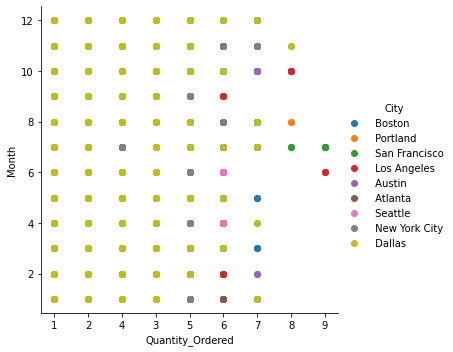

In [31]:
# here i am using bivariate analysis because i want to see city, month, and quantity ordered.

sns.FacetGrid(retail_product,hue="City",size=5).map(plt.scatter,"Quantity_Ordered","Month").add_legend();
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

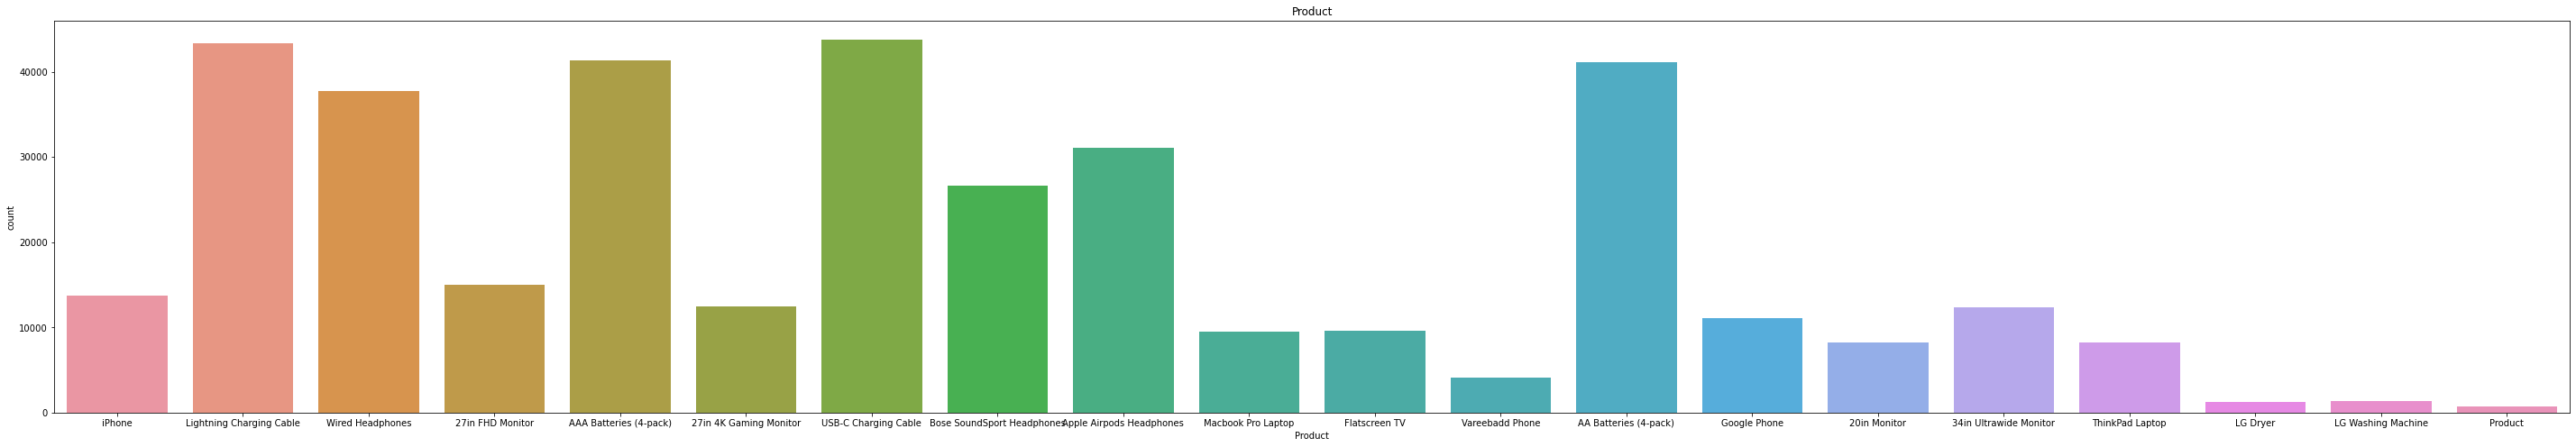

In [32]:
# by this analysis i can compare other product with the other product.

plt.figure(figsize=(50,8))
plt.title('Product')
sns.countplot(x="Product",data=retail_product)
plt.show

### (a) Which City had the highest sales overall?

Ans -- Dallas

### (b)  Which Month had the highest amount of sales overall?

Ans -- 7th Month

### (c)  Most bought products per city?

Ans -- USB C-Charging Cable.

In [33]:
# Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning?

# -----> we can open our branch in " New York city " because according to my analysis the New York city demand is increasing month by month.
# -----> because in this city demand is increasing then we can open a new retail branch store here. Here we can generate lot of profit.

## 5.  Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city?

In [34]:
# here i have made a loop of if and elif for the time to find evening, morning, night etc..

def ftod(x):
    if (x>=0) & (x<6):
        tod = 'night'
    elif (x>=6) & (x<12):
        tod = 'morning'
    elif (x>=12) & (x<18):
        tod = 'afternoon'
    else:
        tod = 'evening'
        return tod

In [35]:
# here i am using time stamp functionality.

retail_product['Time'] = pd.to_datetime(retail_product['Time'], errors='coerce')

In [36]:
# this is the mapping of the data frame of time.
retail_product['tod'] = retail_product.Time.dt.hour.map(ftod)

In [37]:
retail_product   # here i have changed it. and i hav given a name " tod ".

,Product,Quantity_Ordered,Price_Each,City,Time,Year,Month,Day,tod
0,iPhone,1,700,Boston,NaT,2019,1,22,evening
1,Lightning Charging Cable,1,14.95,Portland,NaT,2019,1,28,evening
2,Wired Headphones,2,11.99,San Francisco,NaT,2019,1,17,evening
3,27in FHD Monitor,1,149.99,Los Angeles,NaT,2019,1,5,evening
4,Wired Headphones,1,11.99,Austin,NaT,2019,1,25,evening
...,...,...,...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3,2.99,Los Angeles,NaT,2019,9,17,evening
373696,iPhone,1,700,San Francisco,NaT,2019,9,1,evening
373697,iPhone,1,700,San Francisco,NaT,2019,9,23,evening
373698,34in Ultrawide Monitor,1,379.99,San Francisco,NaT,2019,9,19,evening


<AxesSubplot:xlabel='tod', ylabel='Month'>

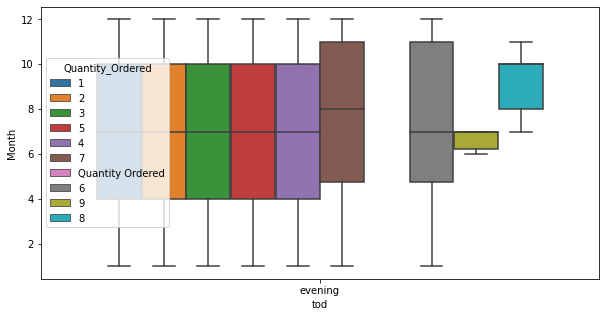

In [57]:
# here is the time of when people had bought most of the product during the time.
# the maximum sales happen in the evening.

plt.figure(figsize=(10,5))
sns.boxplot(x="tod",y="Month",hue="Quantity_Ordered",data=retail_product)

<function matplotlib.pyplot.show(close=None, block=None)>

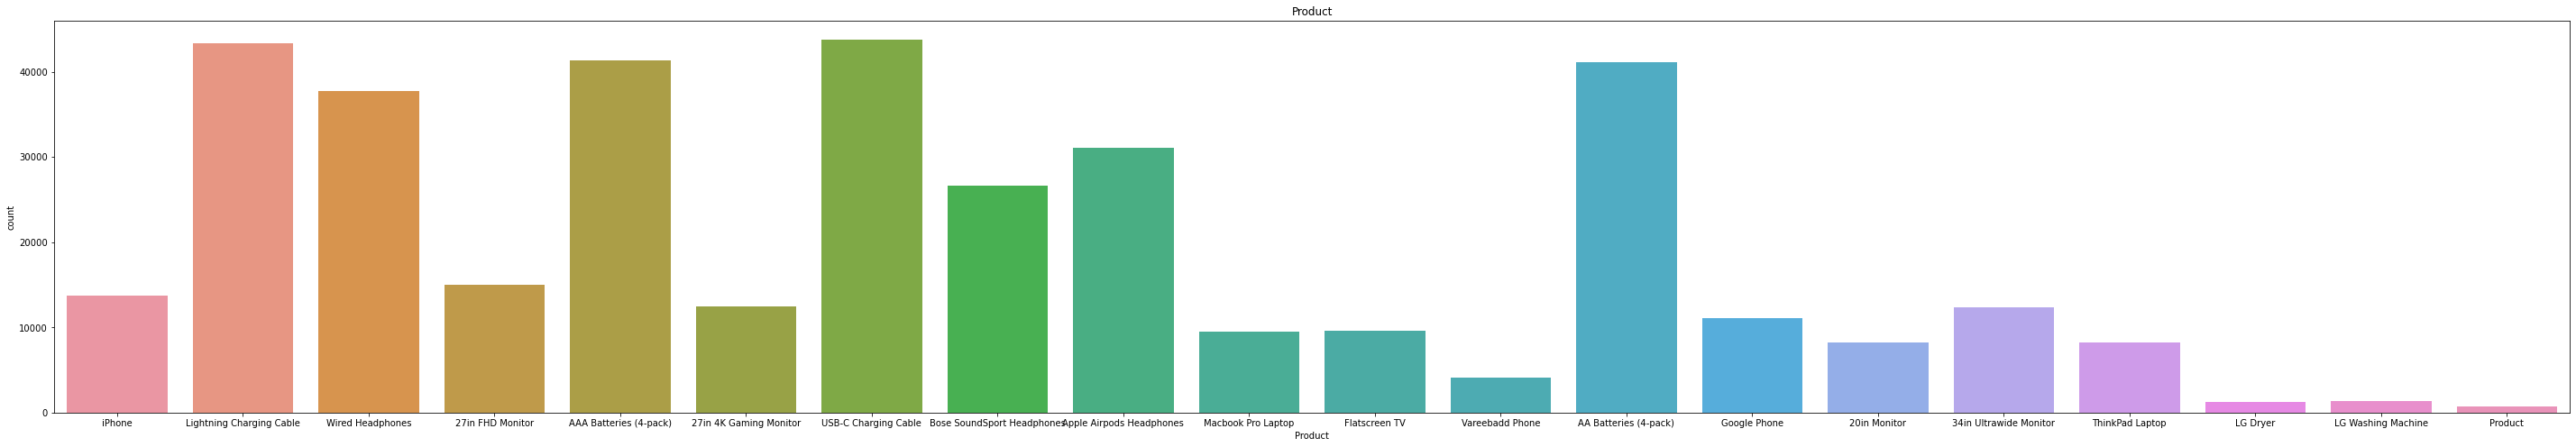

In [60]:
# by this analysis i can compare other product with the other product.

plt.figure(figsize=(50,8))
plt.title('Product')
sns.countplot(x="Product",data=retail_product)
plt.show

###  (a)  What products are mostly sold at different times of the day?

Ans -- USB C-charging cable

### (b)  Which time of day has the most sales?

Ans -- Evening.

In [62]:
# Based on your analysis, suggest the best working hours and the best products for the retail stores in each city?

# here i have seen most of the people are demanding lightning cable and USB C-type charging cable and all so i can suggest that, retain store should keep this type of cable.
# as according to the graph and demand of the people they are buying in the evening a lot of the product.


## 6.  Find out the pair of products that are most sold together? 

TypeError: No loop matching the specified signature and casting was found for ufunc add

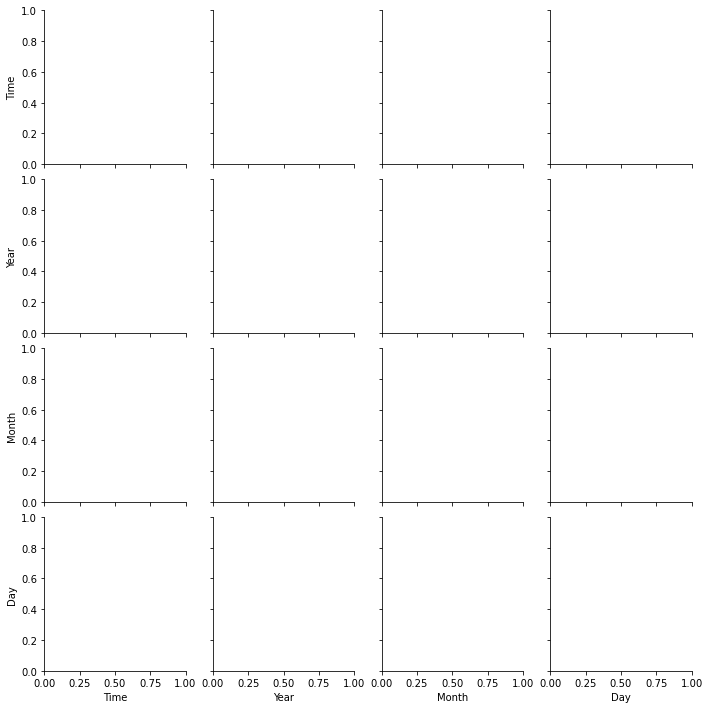

In [74]:
sns.pairplot(retail_product,diag_kind="kde")